In [1]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [2]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [3]:
import StateUtilities as SU

In [4]:
import visualization_helper_v2 as vh

In [5]:
fig_width = 16

In [6]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s330/20210613-0941/",
            "../checkpoints/s331/20210614-0939/"]

In [7]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [8]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.


In [9]:
vh.get_arguments_overview(dirnames)

,b001,s330,s331
algorithm,baseline_rule-based,ddqn,ddqn
lr,0.01,0.08,0.08
batch_size,128,256,256
lambda_rwd_mstpc,0.1,0.073,0.073
lambda_rwd_energy,5e-06,0.008,0.008
energy_cons_in_kWh,0,1,1
stp_reward_step_offset,1.0,0.0,0.0
target_network_update_freq,3,2,2
epsilon_final_step,100,12800,21600
episodes_count,100,160,160


In [10]:
vh.get_runtime_overview_df(alldfs, dirnames)

,b001,s330,s331
Number of training episodes,1.0,12800.000000,21600.000000
Runtime in s,0.0,57619.871013,98814.443533
Runtime in h,0.0,16.005520,27.448457
Mean episode runtime in s,0.0,4.501552,4.574743
Mean episode runtime during eval. episode in s,0.0,4.567967,4.665761
Mean episode runtime after eval. episode in s,NaN,4.451390,4.499632
Mean episode runtime in no eval. episode in s,NaN,4.501135,4.574170


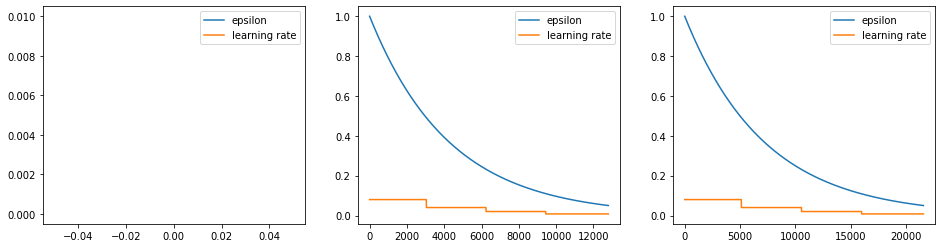

In [11]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

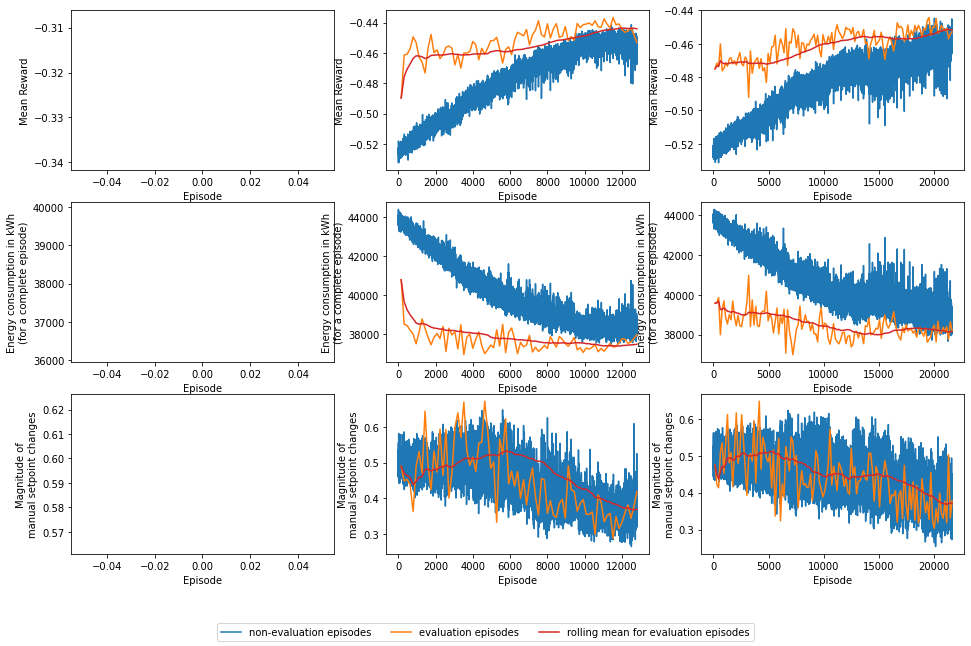

In [12]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

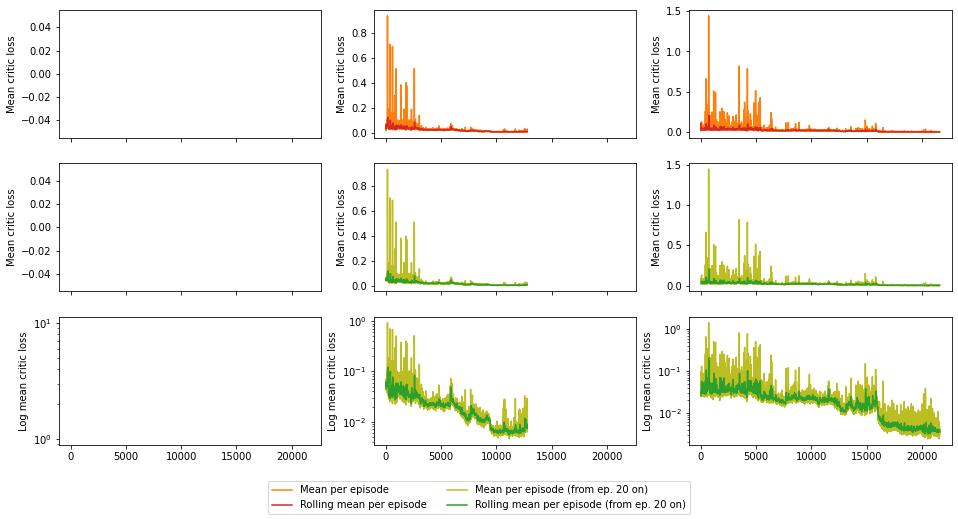

In [13]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

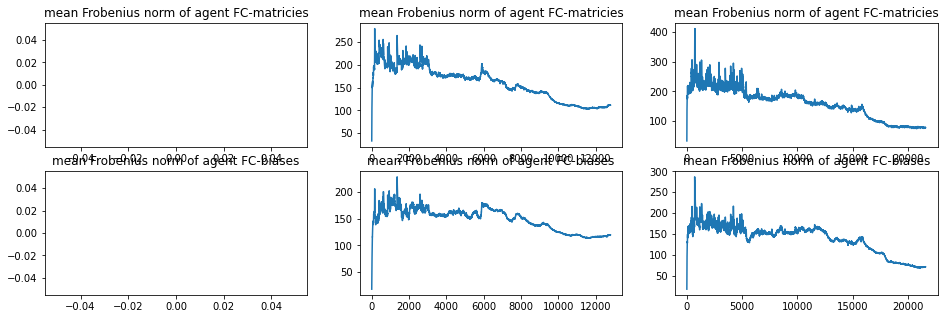

In [14]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [15]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  12799
Last available evaluation episode for dfs2:  21599


<h3>Details for one week</h3>

In [16]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [17]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [18]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   38042.14 kWh; Sum of setpoint change magnitudes: 426.88118883889297
For episode 12799: Energy consumption:   37974.81 kWh; Sum of setpoint change magnitudes: 301.29946383677105
For episode 21599: Energy consumption:   38217.34 kWh; Sum of setpoint change magnitudes: 271.7579554273448

Mean values for episode ...
...     0: Reward: -0.32392 kWh; Setpoint change magnit.:  0.59372; Energy cons.: 52909.78911
... 12799: Reward: -0.45312 kWh; Setpoint change magnit.:  0.41905; Energy cons.: 52816.15421
... 21599: Reward: -0.45282 kWh; Setpoint change magnit.:  0.37797; Energy cons.: 53153.46124


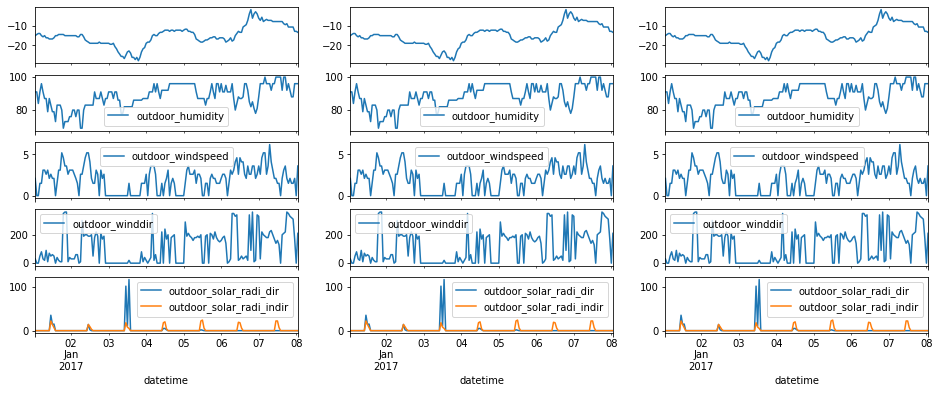

In [19]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

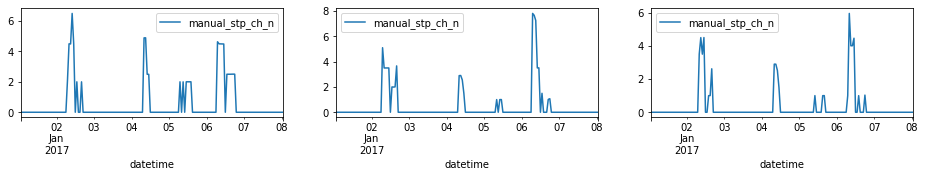

In [20]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

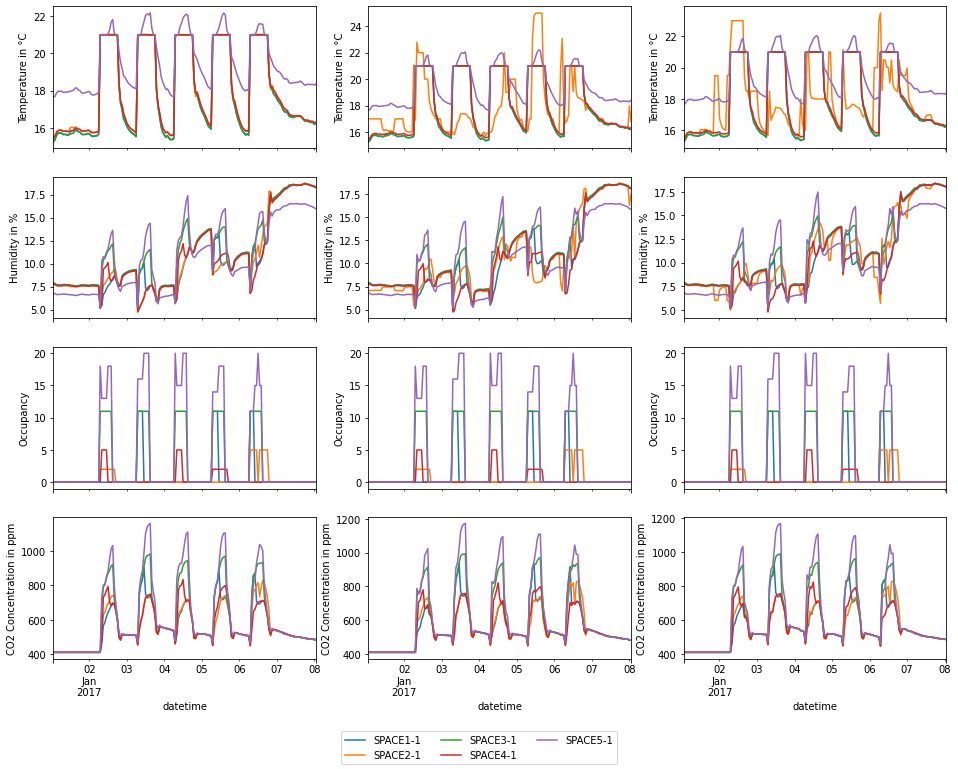

In [21]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [22]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 



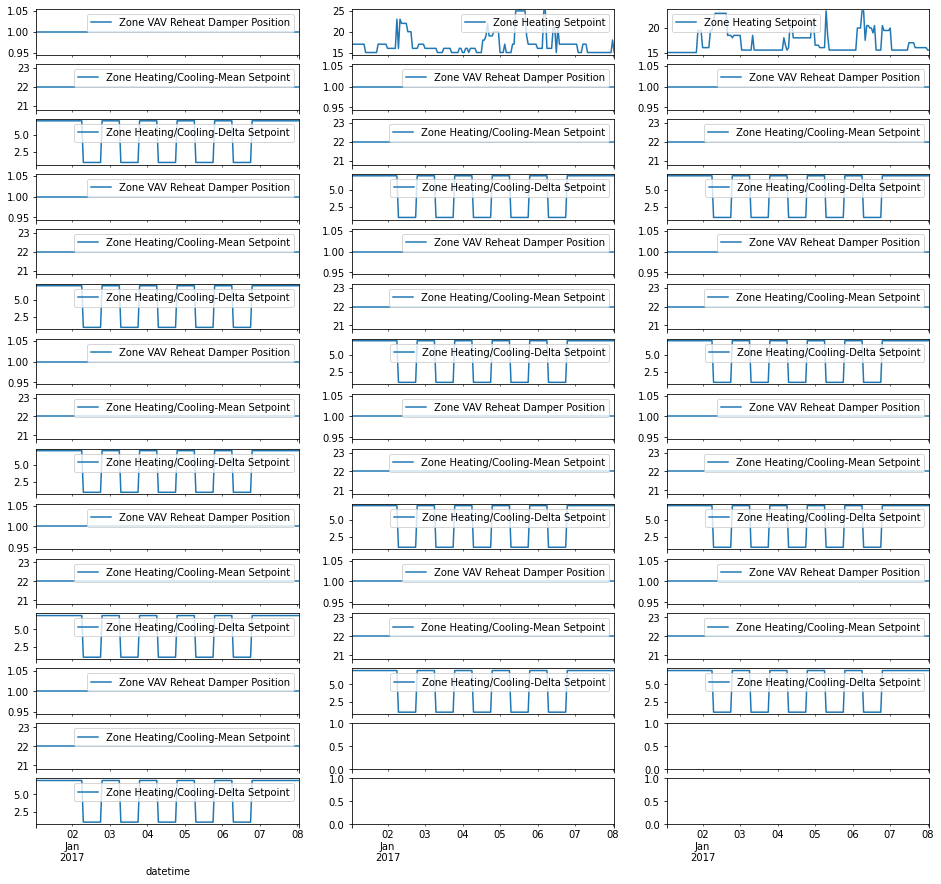

In [23]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

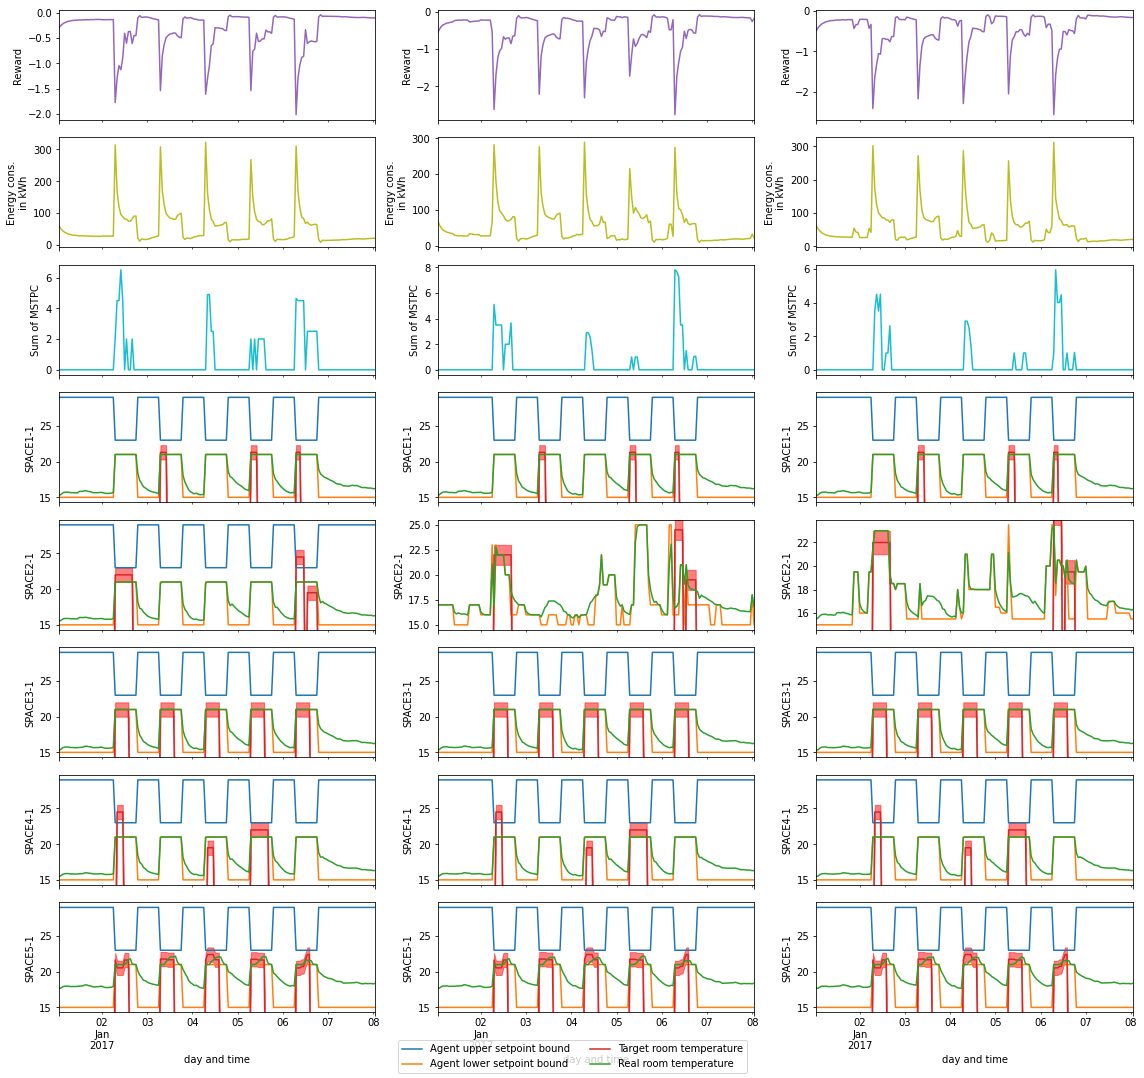

In [24]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [25]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [26]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

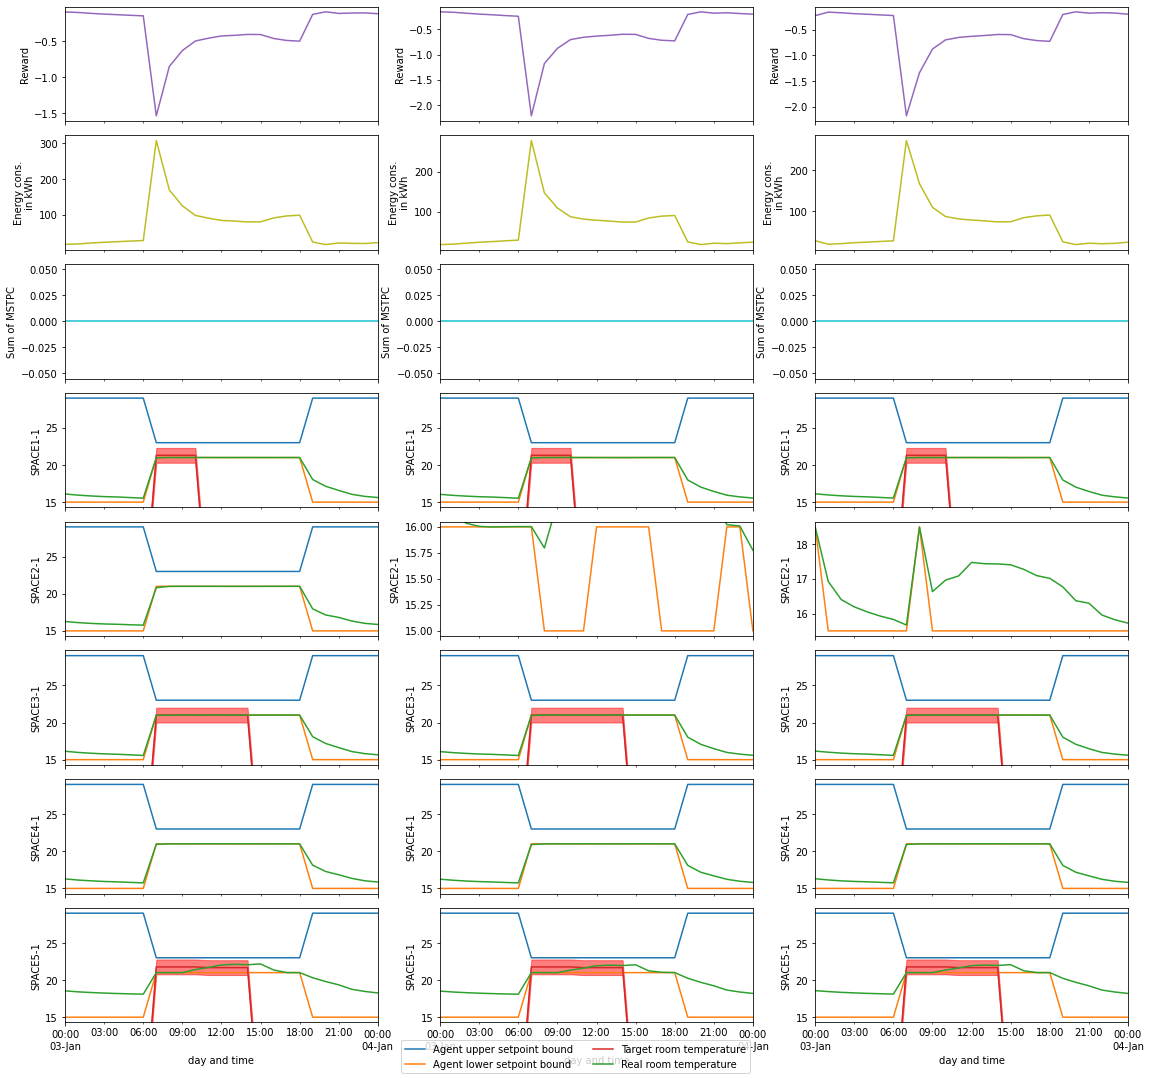

In [27]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [28]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [29]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  52002.0 Wh, mean reward = -0.3174
For plot number 2, mean energy consumption =  51882.5 Wh, mean reward = -0.4449
For plot number 3, mean energy consumption =  52253.4 Wh, mean reward = -0.4445


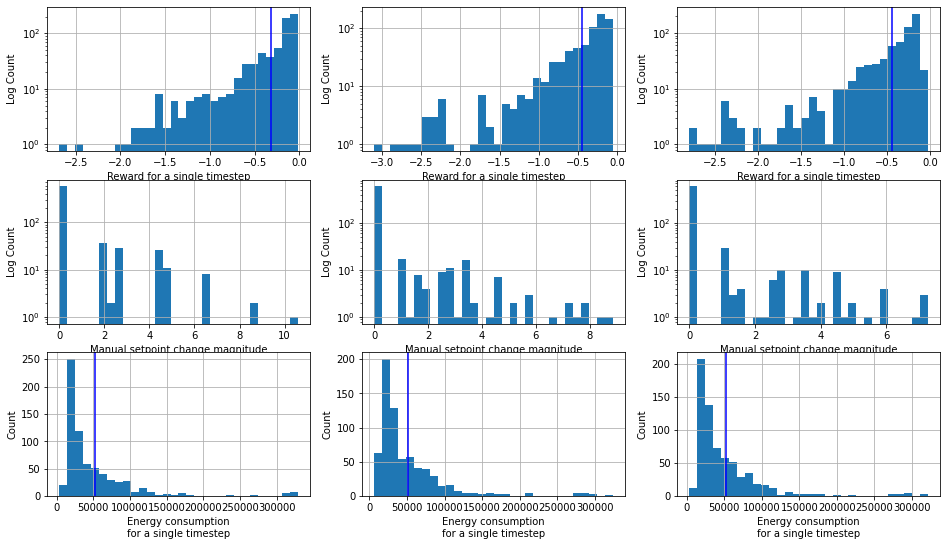

In [30]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

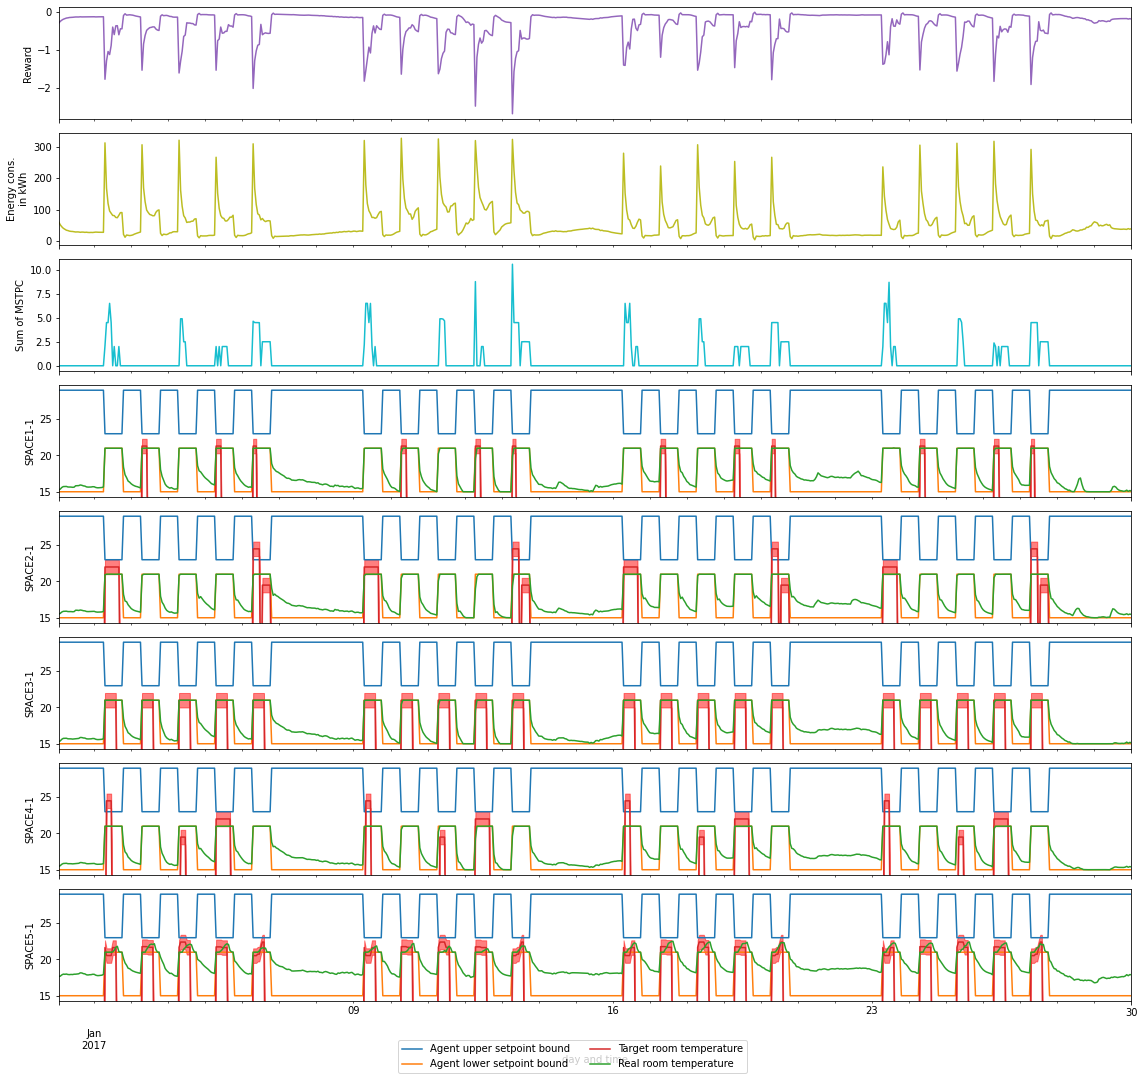

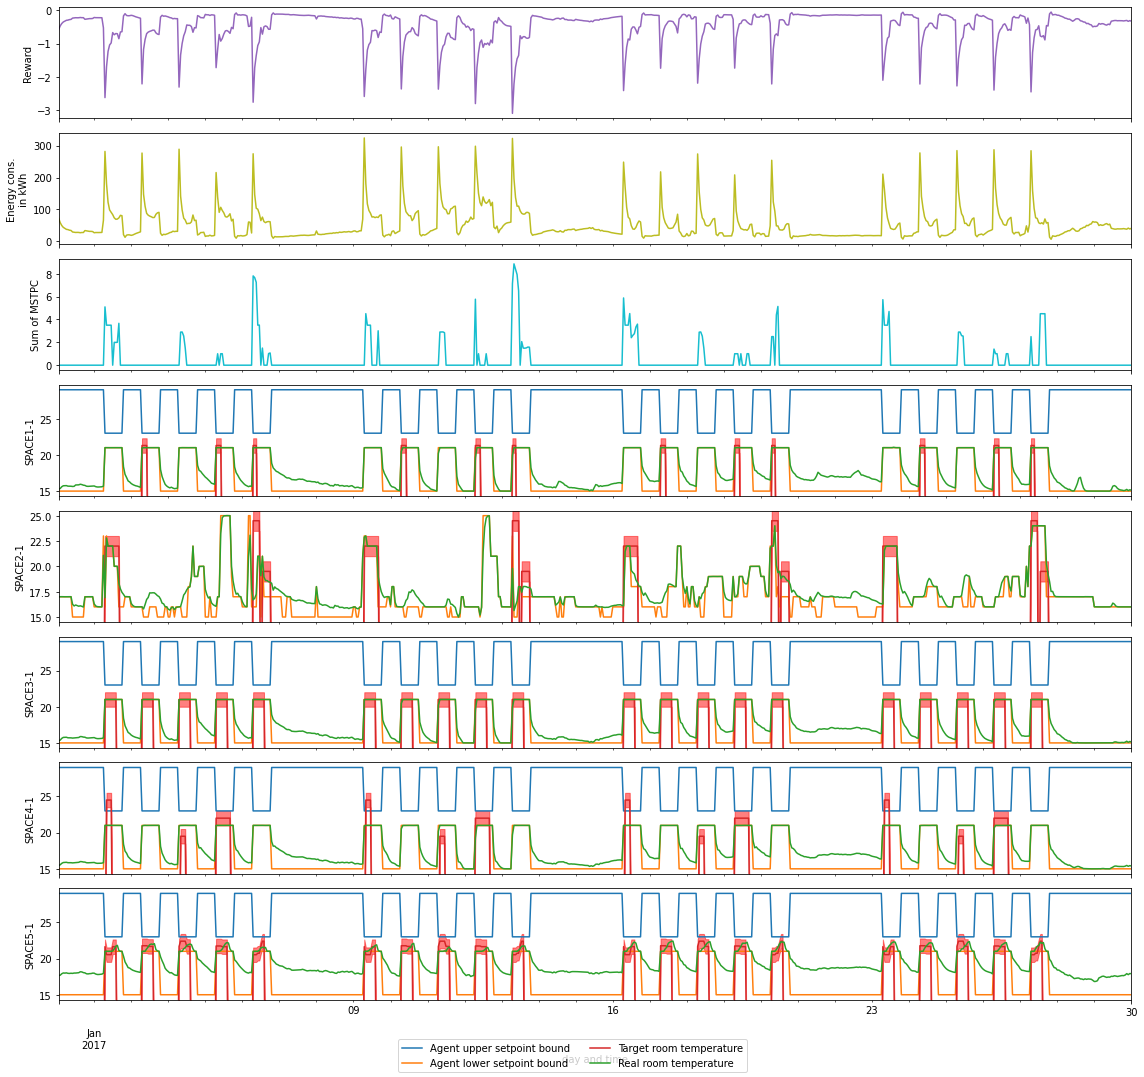

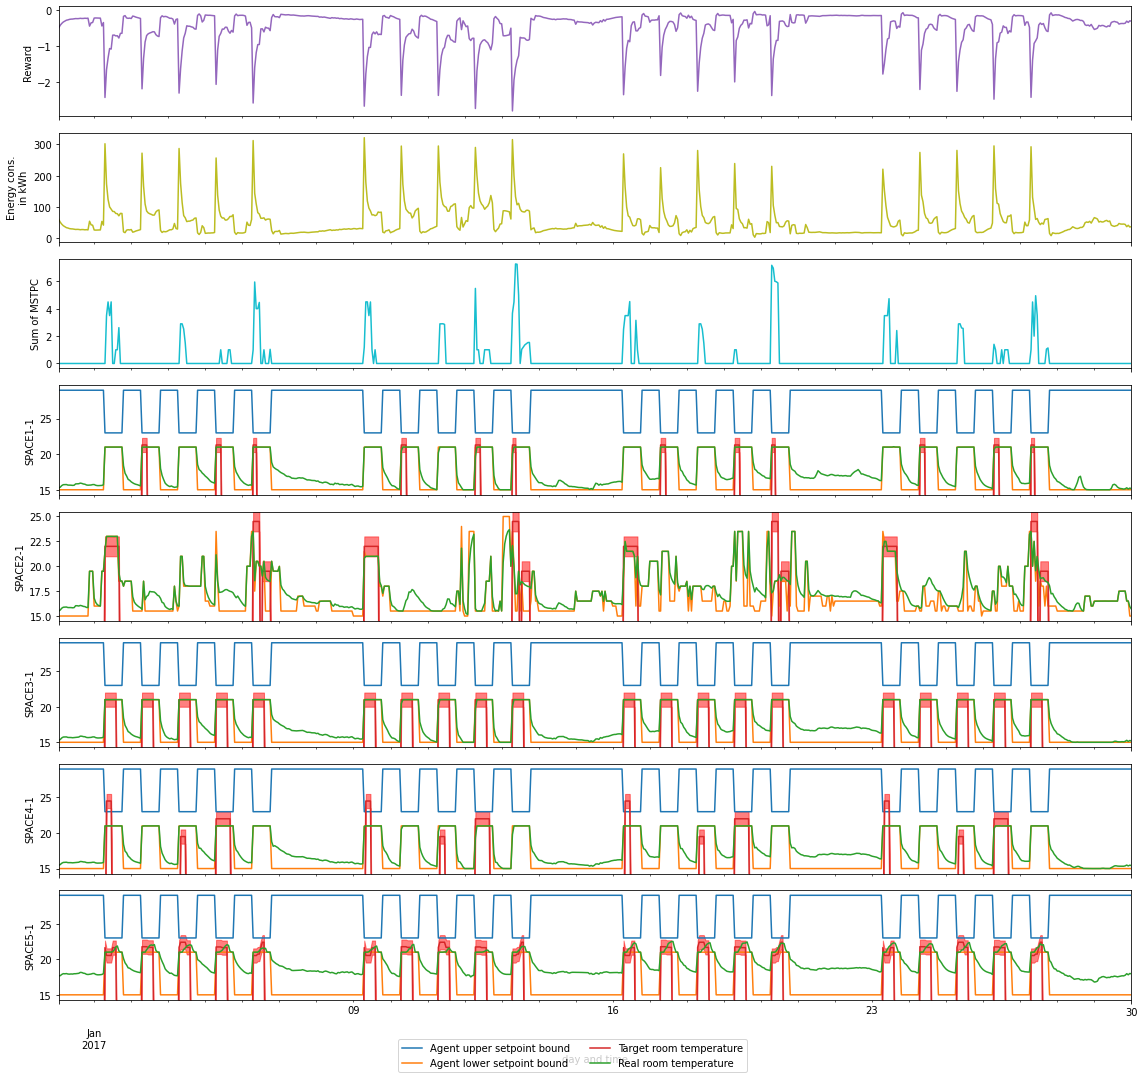

In [31]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

No q-values available for scenario 1: s330, agent 1
No q-values available for scenario 1: s330, agent 2
No q-values available for scenario 1: s330, agent 3
No q-values available for scenario 1: s330, agent 4
No q-values available for scenario 2: s331, agent 1
No q-values available for scenario 2: s331, agent 2
No q-values available for scenario 2: s331, agent 3
No q-values available for scenario 2: s331, agent 4


(<Figure size 1152x432 with 4 Axes>,
 array([<AxesSubplot:ylabel='Scenario 1: s330\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 2: s331\nAgent 0'>], dtype=object))

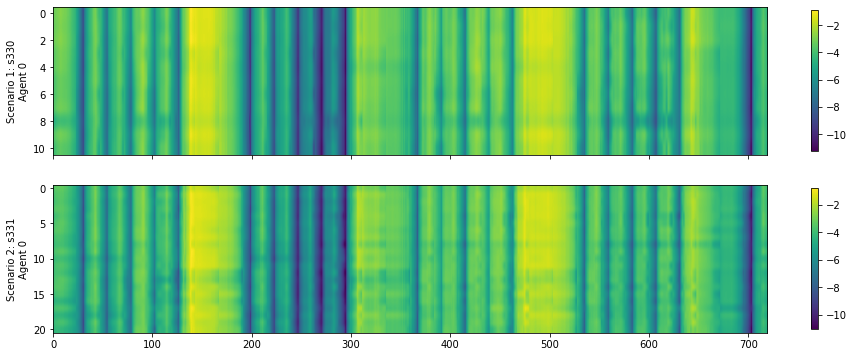

In [32]:
vh.plot_q_values(q_values, fig_width)